## Resample Data to Different Frequencies

In this tutorial, we'll explore how to resample data using the gridstatusio API. For example. you'll see how to convert data reported every 5 minutes to an hourly format.

In [1]:
import plotly.graph_objects as go

import gridstatusio

gridstatusio.__version__

'0.6.5'

## Initialize the gridstatusio client

We set up the GridStatusClient to fetch our data.

In [2]:
client = gridstatusio.GridStatusClient()

GridStatusClient(host=https://api.gridstatus.io/v1)

## Fetch Data at Different Frequencies

First, let's query the raw 5 minute data to see what it looks like

In [3]:
df_5min = client.get_dataset(
    dataset="caiso_load",
    start="Sep 1, 2023",
    end="Sep 2, 2023",
    tz="US/Pacific",
)

df_5min

Fetching Page 1...Done in 0.15 seconds. 

Total number of rows: 288


interval_start_local        interval_end_local   load
0   2023-09-01 00:00:00-07:00 2023-09-01 00:05:00-07:00  27923
1   2023-09-01 00:05:00-07:00 2023-09-01 00:10:00-07:00  28025
2   2023-09-01 00:10:00-07:00 2023-09-01 00:15:00-07:00  28073
3   2023-09-01 00:15:00-07:00 2023-09-01 00:20:00-07:00  27905
4   2023-09-01 00:20:00-07:00 2023-09-01 00:25:00-07:00  27870
..                        ...                       ...    ...
283 2023-09-01 23:35:00-07:00 2023-09-01 23:40:00-07:00  27338
284 2023-09-01 23:40:00-07:00 2023-09-01 23:45:00-07:00  27225
285 2023-09-01 23:45:00-07:00 2023-09-01 23:50:00-07:00  27085
286 2023-09-01 23:50:00-07:00 2023-09-01 23:55:00-07:00  26936
287 2023-09-01 23:55:00-07:00 2023-09-02 00:00:00-07:00  26808

[288 rows x 3 columns]

Next, you can get data at various time intervals by setting the `resample` option. In the example below, we change the data intervals to either 15 minutes or 1 hour. The API calculates the average of all values within each new time window.

In [4]:
df_15min = client.get_dataset(
    dataset="caiso_load",
    start="Sep 1, 2023",
    end="Sep 2, 2023",
    resample="15 minutes",
    tz="US/Pacific",
)

df_15min.head(20)

Cursor pagination cannot be used with resampling.
Fetching Page 1...Done in 0.17 seconds. 

Total number of rows: 96


interval_start_local        interval_end_local        load
0  2023-09-01 00:00:00-07:00 2023-09-01 00:15:00-07:00 28_007.0000
1  2023-09-01 00:15:00-07:00 2023-09-01 00:30:00-07:00 27_838.3333
2  2023-09-01 00:30:00-07:00 2023-09-01 00:45:00-07:00 27_424.3333
3  2023-09-01 00:45:00-07:00 2023-09-01 01:00:00-07:00 27_042.0000
4  2023-09-01 01:00:00-07:00 2023-09-01 01:15:00-07:00 26_691.0000
5  2023-09-01 01:15:00-07:00 2023-09-01 01:30:00-07:00 26_438.0000
6  2023-09-01 01:30:00-07:00 2023-09-01 01:45:00-07:00 26_097.6667
7  2023-09-01 01:45:00-07:00 2023-09-01 02:00:00-07:00 25_803.6667
8  2023-09-01 02:00:00-07:00 2023-09-01 02:15:00-07:00 25_525.0000
9  2023-09-01 02:15:00-07:00 2023-09-01 02:30:00-07:00 25_338.6667
10 2023-09-01 02:30:00-07:00 2023-09-01 02:45:00-07:00 25_100.3333
11 2023-09-01 02:45:00-07:00 2023-09-01 03:00:00-07:00 24_894.0000
12 2023-09-01 03:00:00-07:00 2023-09-01 03:15:00-07:00 24_751.6667
13 2023-09-01 03:15:00-07:00 2023-09-01 03:30:00-07:00 24_629.3333
14 2023-09-01 03:30:00-07:00 2023-09-01 03:45:00-07:00 24_479.3333
15 2023-09-01 03:45:00-07:00 2023-09-01 04:00:00-07:00 24_377.0000
16 2023-09-01 04:00:00-07:00 2023-09-01 04:15:00-07:00 24_422.0000
17 2023-09-01 04:15:00-07:00 2023-09-01 04:30:00-07:00 24_534.6667
18 2023-09-01 04:30:00-07:00 2023-09-01 04:45:00-07:00 24_592.3333
19 2023-09-01 04:45:00-07:00 2023-09-01 05:00:00-07:00 24_654.0000

In [5]:
df_hourly = client.get_dataset(
    dataset="caiso_load",
    start="Sep 1, 2023",
    end="Sep 2, 2023",
    resample="1 hour",
    tz="US/Pacific",
)
df_hourly.head(10)

Cursor pagination cannot be used with resampling.
Fetching Page 1...Done in 0.15 seconds. 

Total number of rows: 24


interval_start_local        interval_end_local        load
0 2023-09-01 00:00:00-07:00 2023-09-01 01:00:00-07:00 27_577.9167
1 2023-09-01 01:00:00-07:00 2023-09-01 02:00:00-07:00 26_257.5833
2 2023-09-01 02:00:00-07:00 2023-09-01 03:00:00-07:00 25_214.5000
3 2023-09-01 03:00:00-07:00 2023-09-01 04:00:00-07:00 24_559.3333
4 2023-09-01 04:00:00-07:00 2023-09-01 05:00:00-07:00 24_550.7500
5 2023-09-01 05:00:00-07:00 2023-09-01 06:00:00-07:00 25_339.0000
6 2023-09-01 06:00:00-07:00 2023-09-01 07:00:00-07:00 26_677.6667
7 2023-09-01 07:00:00-07:00 2023-09-01 08:00:00-07:00 27_467.5000
8 2023-09-01 08:00:00-07:00 2023-09-01 09:00:00-07:00 27_455.1667
9 2023-09-01 09:00:00-07:00 2023-09-01 10:00:00-07:00 27_274.6667

## Visualize the Data

We'll use Plotly to visualize the CAISO load data resampled at different frequencies. We can see how the the time series was averaged when resample to the other frequencies

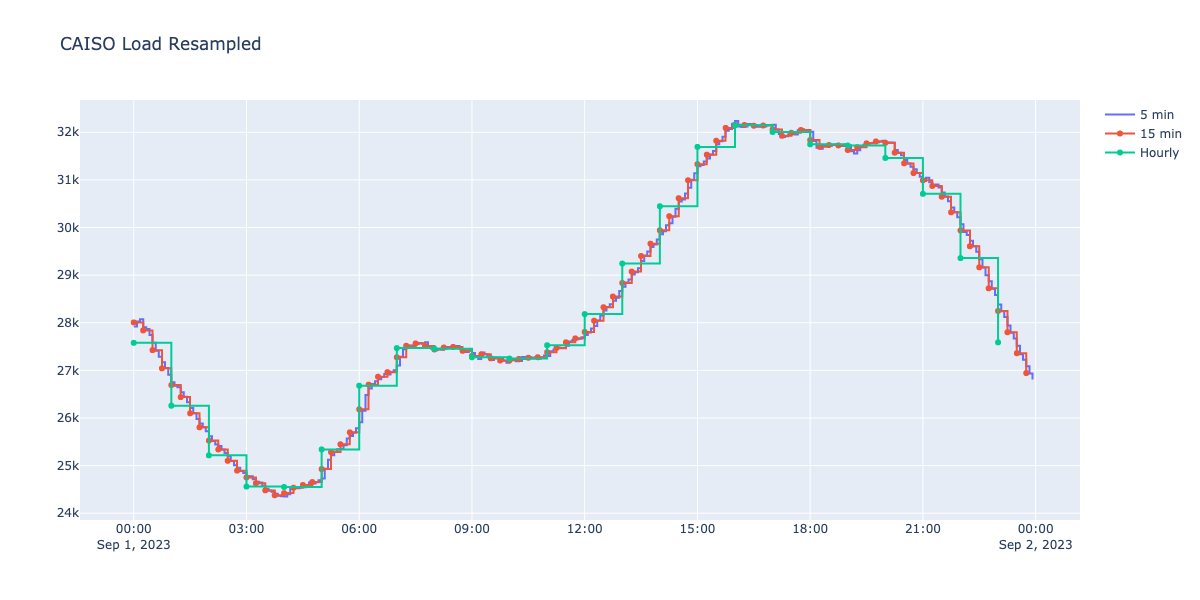

In [6]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df_5min["interval_start_local"],
        y=df_5min["load"],
        name="5 min",
        mode="lines",
        line_shape="hv",
    )
)

fig.add_trace(
    go.Scatter(
        x=df_15min["interval_start_local"],
        y=df_15min["load"],
        name="15 min",
        mode="lines+markers",
        line_shape="hv",
    )
)

fig.add_trace(
    go.Scatter(
        x=df_hourly["interval_start_local"],
        y=df_hourly["load"],
        name="Hourly",
        mode="lines+markers",
        line_shape="hv",
    )
)

fig.update_layout(title="CAISO Load Resampled")

fig.show("png", width=1200, height=600)

## Change the resampling function

By default, values within each resampling window are aggregated mean "mean". This can be changed with the `resample_function`. Possible values are "mean", "sum", "min", "max", "stddev", "count", "variance". If resample is None, this is ignored.

Below, we also query for the min and max of the load in each 1 hour window and then plot

In [7]:
df_hourly_min = client.get_dataset(
    dataset="caiso_load",
    start="Sep 1, 2023",
    end="Sep 2, 2023",
    resample="1 hour",
    resample_function="min",
    tz="US/Pacific",
)

df_hourly_max = client.get_dataset(
    dataset="caiso_load",
    start="Sep 1, 2023",
    end="Sep 2, 2023",
    resample="1 hour",
    resample_function="max",
    tz="US/Pacific",
)

Cursor pagination cannot be used with resampling.
Fetching Page 1...Done in 0.18 seconds. 

Total number of rows: 24
Cursor pagination cannot be used with resampling.
Fetching Page 1...Done in 0.17 seconds. 

Total number of rows: 24


interval_start_local        interval_end_local   load
0  2023-09-01 00:00:00-07:00 2023-09-01 01:00:00-07:00  28073
1  2023-09-01 01:00:00-07:00 2023-09-01 02:00:00-07:00  26750
2  2023-09-01 02:00:00-07:00 2023-09-01 03:00:00-07:00  25616
3  2023-09-01 03:00:00-07:00 2023-09-01 04:00:00-07:00  24774
4  2023-09-01 04:00:00-07:00 2023-09-01 05:00:00-07:00  24691
5  2023-09-01 05:00:00-07:00 2023-09-01 06:00:00-07:00  25784
6  2023-09-01 06:00:00-07:00 2023-09-01 07:00:00-07:00  27004
7  2023-09-01 07:00:00-07:00 2023-09-01 08:00:00-07:00  27588
8  2023-09-01 08:00:00-07:00 2023-09-01 09:00:00-07:00  27512
9  2023-09-01 09:00:00-07:00 2023-09-01 10:00:00-07:00  27377
10 2023-09-01 10:00:00-07:00 2023-09-01 11:00:00-07:00  27314
11 2023-09-01 11:00:00-07:00 2023-09-01 12:00:00-07:00  27697
12 2023-09-01 12:00:00-07:00 2023-09-01 13:00:00-07:00  28668
13 2023-09-01 13:00:00-07:00 2023-09-01 14:00:00-07:00  29747
14 2023-09-01 14:00:00-07:00 2023-09-01 15:00:00-07:00  31140
15 2023-09-01 15:00:00-07:00 2023-09-01 16:00:00-07:00  32178
16 2023-09-01 16:00:00-07:00 2023-09-01 17:00:00-07:00  32237
17 2023-09-01 17:00:00-07:00 2023-09-01 18:00:00-07:00  32158
18 2023-09-01 18:00:00-07:00 2023-09-01 19:00:00-07:00  32013
19 2023-09-01 19:00:00-07:00 2023-09-01 20:00:00-07:00  31824
20 2023-09-01 20:00:00-07:00 2023-09-01 21:00:00-07:00  31783
21 2023-09-01 21:00:00-07:00 2023-09-01 22:00:00-07:00  31043
22 2023-09-01 22:00:00-07:00 2023-09-01 23:00:00-07:00  30068
23 2023-09-01 23:00:00-07:00 2023-09-02 00:00:00-07:00  28382

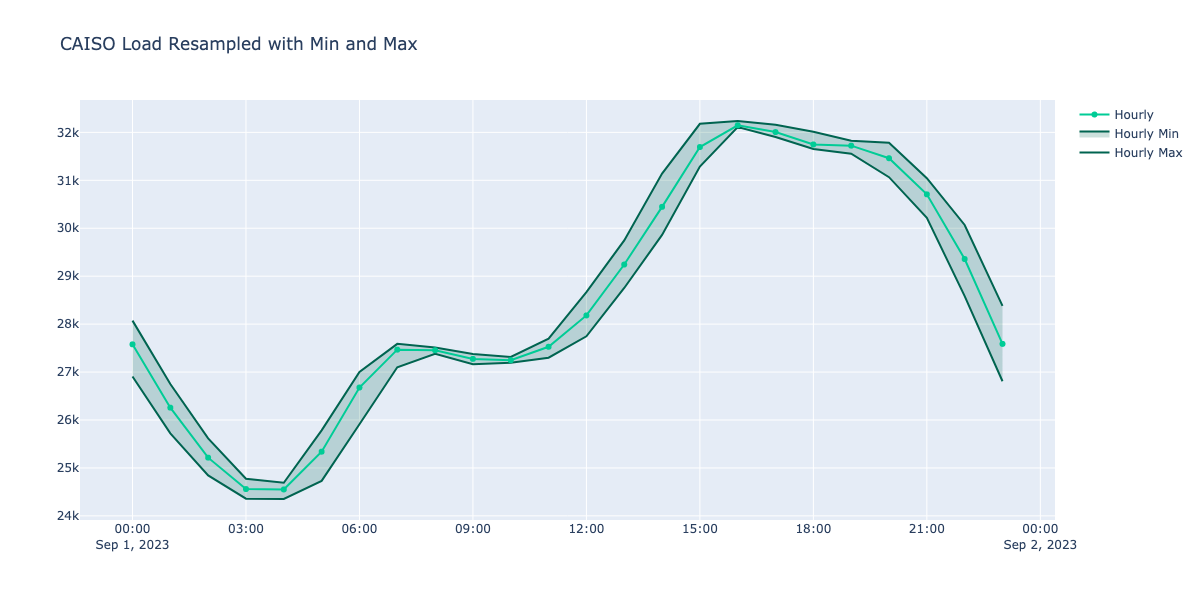

In [8]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df_hourly_max["interval_start_local"],
        y=df_hourly_max["load"],
        name="Hourly Max",
        mode="lines",
        line=dict(color="rgb(0,100,80)"),
    )
)

fig.add_trace(
    go.Scatter(
        x=df_hourly_min["interval_start_local"],
        y=df_hourly_min["load"],
        name="Hourly Min",
        mode="lines",
        line=dict(color="rgb(0,100,80)"),
        fill="tonexty",
        fillcolor="rgba(0,100,80,0.2)",
    )
)

fig.add_trace(
    go.Scatter(
        x=df_hourly["interval_start_local"],
        y=df_hourly["load"],
        name="Hourly",
        mode="lines+markers",
    )
)

fig.update_layout(title="CAISO Load Resampled with Min and Max")

fig.show("png", width=1200, height=600)

## Specifying Columns to Resample
When dealing with multiple numeric columns, you can choose which ones to resample by using the columns parameter.

In [9]:
prc_df_raw = client.get_dataset(
    dataset="ercot_real_time_as_monitor",
    start="Sep 1, 2023",
    end="Sep 2, 2023",
    columns=["prc"],
    tz="US/Central",
)

prc_df_raw

Fetching Page 1...Done in 0.2 seconds. 

Total number of rows: 8010


time_local   prc
0    2023-09-01 00:00:06-05:00  8417
1    2023-09-01 00:00:14-05:00  8577
2    2023-09-01 00:00:22-05:00  8577
3    2023-09-01 00:00:30-05:00  8598
4    2023-09-01 00:00:38-05:00  8619
...                        ...   ...
8005 2023-09-01 23:59:14-05:00  9060
8006 2023-09-01 23:59:26-05:00  8920
8007 2023-09-01 23:59:34-05:00  8920
8008 2023-09-01 23:59:46-05:00  8899
8009 2023-09-01 23:59:54-05:00  8620

[8010 rows x 2 columns]

to make it easier to work with, we can resample regular 1 minute intervals. when the data doesn't contain intervals, a `resample_frequency` column is added

In [10]:
prc_df_1min = client.get_dataset(
    dataset="ercot_real_time_as_monitor",
    start="Sep 1, 2023",
    end="Sep 2, 2023",
    resample="1 minute",
    columns=["prc"],
    tz="US/Central",
)

prc_df_1min

Cursor pagination cannot be used with resampling.
Fetching Page 1...Done in 0.22 seconds. 

Total number of rows: 1440


time_local      interval_start_local  \
0    2023-09-01 00:00:00-05:00 2023-09-01 00:00:00-05:00   
1    2023-09-01 00:01:00-05:00 2023-09-01 00:01:00-05:00   
2    2023-09-01 00:02:00-05:00 2023-09-01 00:02:00-05:00   
3    2023-09-01 00:03:00-05:00 2023-09-01 00:03:00-05:00   
4    2023-09-01 00:04:00-05:00 2023-09-01 00:04:00-05:00   
...                        ...                       ...   
1435 2023-09-01 23:55:00-05:00 2023-09-01 23:55:00-05:00   
1436 2023-09-01 23:56:00-05:00 2023-09-01 23:56:00-05:00   
1437 2023-09-01 23:57:00-05:00 2023-09-01 23:57:00-05:00   
1438 2023-09-01 23:58:00-05:00 2023-09-01 23:58:00-05:00   
1439 2023-09-01 23:59:00-05:00 2023-09-01 23:59:00-05:00   

            interval_end_local        prc  
0    2023-09-01 00:01:00-05:00 8_573.6667  
1    2023-09-01 00:02:00-05:00 8_693.3333  
2    2023-09-01 00:03:00-05:00 8_739.6000  
3    2023-09-01 00:04:00-05:00 8_771.0000  
4    2023-09-01 00:05:00-05:00 8_830.2000  
...                        ...        ...  
1435 2023-09-01 23:56:00-05:00 9_187.3333  
1436 2023-09-01 23:57:00-05:00 9_187.6667  
1437 2023-09-01 23:58:00-05:00 9_168.6667  
1438 2023-09-01 23:59:00-05:00 9_138.5000  
1439 2023-09-02 00:00:00-05:00 8_925.8333  

[1440 rows x 4 columns]

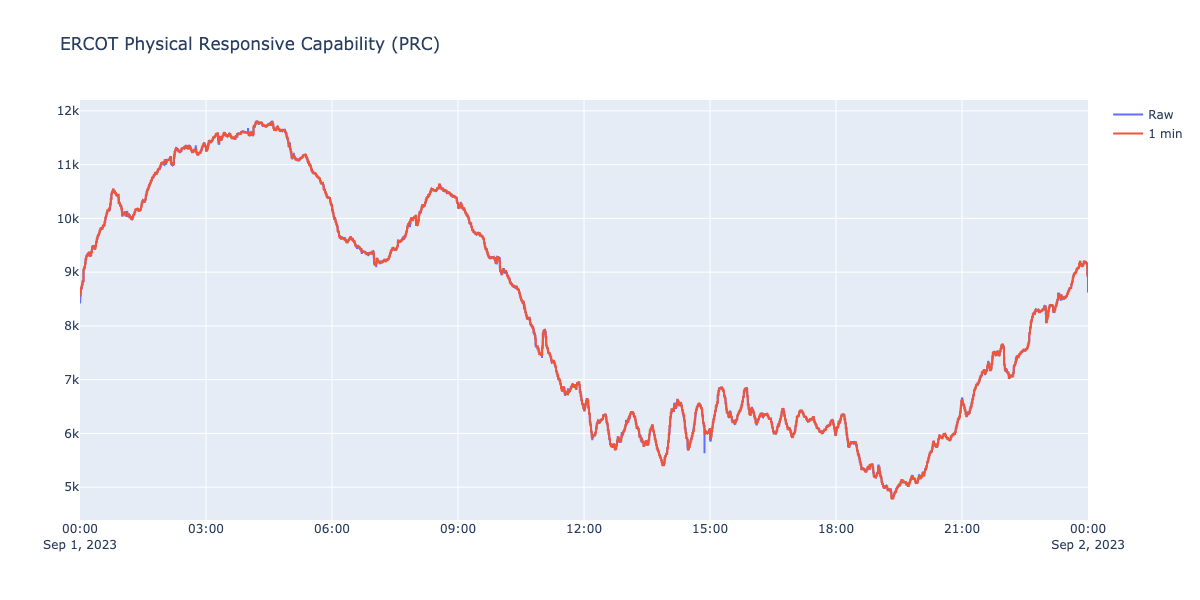

In [11]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=prc_df_raw["time_local"],
        y=prc_df_raw["prc"],
        name="Raw",
        mode="lines",
    )
)

fig.add_trace(
    go.Scatter(
        x=prc_df_1min["time_local"],
        y=prc_df_1min["prc"],
        name="1 min",
        mode="lines",
        line_shape="hv",
    )
)

fig.update_layout(title="ERCOT Physical Responsive Capability (PRC)")

fig.show("png", width=1200, height=600)

## Specifying Columns to group by for Resampling in Multi-Series Datasets
In datasets with multiple time series, you may want to specify which columns to group by before resampling. For instance, in the EIA dataset that includes interchange data between balancing authorities, you can use the resample_by parameter to select specific columns.

Here's an example using the eia_ba_interchange_hourly dataset:

In [12]:
eia_daily_interchange = client.get_dataset(
    dataset="eia_ba_interchange_hourly",
    start="Sep 1, 2023",
    end="Oct 1, 2023",
    resample="1 day",
    resample_by=["interval_start_utc", "to_ba", "from_ba"],
    tz="US/Central",
)

eia_daily_interchange

Cursor pagination cannot be used with resampling.
Fetching Page 1...Done in 0.4 seconds. 

Total number of rows: 10540


interval_start_local        interval_end_local to_ba from_ba  \
0     2023-08-31 19:00:00-05:00 2023-09-01 19:00:00-05:00  AECI    MISO   
1     2023-08-31 19:00:00-05:00 2023-09-01 19:00:00-05:00  AECI     SPA   
2     2023-08-31 19:00:00-05:00 2023-09-01 19:00:00-05:00  AECI    SWPP   
3     2023-08-31 19:00:00-05:00 2023-09-01 19:00:00-05:00  AECI     TVA   
4     2023-08-31 19:00:00-05:00 2023-09-01 19:00:00-05:00  AESO    NWMT   
...                         ...                       ...   ...     ...   
10535 2023-09-30 19:00:00-05:00 2023-10-01 19:00:00-05:00  WAUW    SWPP   
10536 2023-09-30 19:00:00-05:00 2023-10-01 19:00:00-05:00  WAUW    WACM   
10537 2023-09-30 19:00:00-05:00 2023-10-01 19:00:00-05:00   WWA    NWMT   
10538 2023-09-30 19:00:00-05:00 2023-10-01 19:00:00-05:00   YAD    CPLE   
10539 2023-09-30 19:00:00-05:00 2023-10-01 19:00:00-05:00   YAD     DUK   

             mw  
0       68.3158  
1       80.4737  
2      331.0526  
3     -150.1053  
4       78.7368  
...         ...  
10535   62.2000  
10536    0.0000  
10537  -56.0000  
10538   14.2000  
10539  -15.0000  

[10540 rows x 5 columns]